
⏳ Prévision de Température (°C)...


15:51:38 - cmdstanpy - INFO - Chain [1] start processing
15:53:07 - cmdstanpy - INFO - Chain [1] done processing


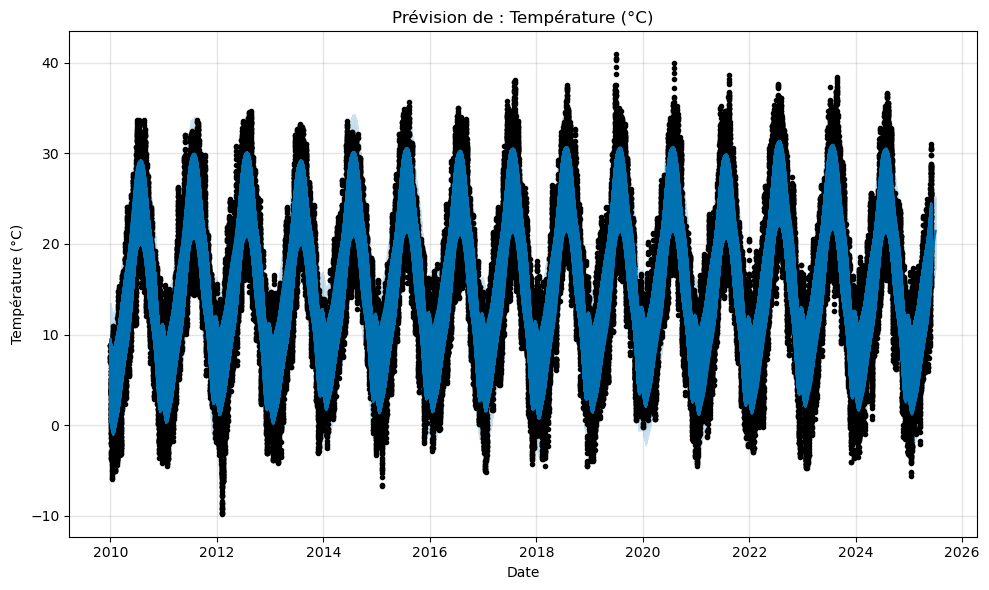


⏳ Prévision de Précipitations (mm)...


15:53:42 - cmdstanpy - INFO - Chain [1] start processing
15:54:16 - cmdstanpy - INFO - Chain [1] done processing


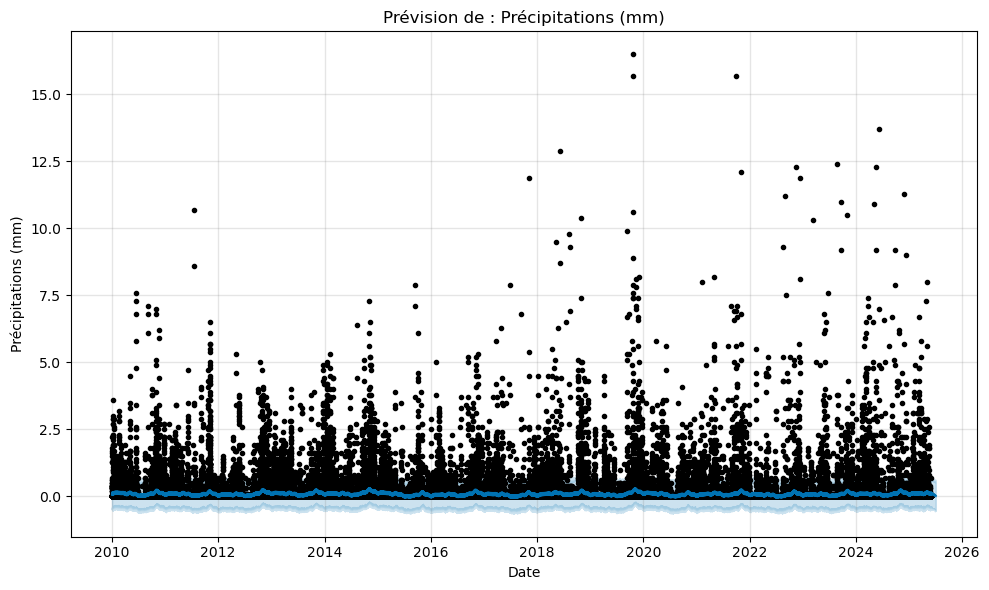


⏳ Prévision de Vitesse du vent (km/h)...


15:54:50 - cmdstanpy - INFO - Chain [1] start processing
15:55:45 - cmdstanpy - INFO - Chain [1] done processing


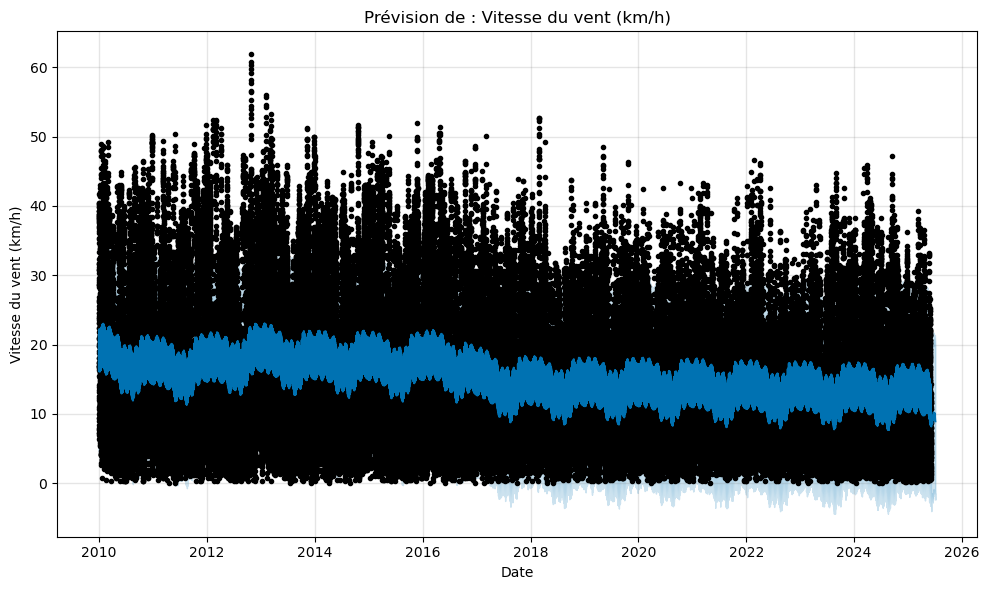

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Charger les données
prophet_df = pd.read_csv("meteo_aix.csv")
prophet_df["date"] = pd.to_datetime(prophet_df["date"]).dt.tz_localize(None)


# Variables à prédire
targets = {
    "Température (°C)": "temperature_2m",
    "Précipitations (mm)": "precipitation",
    "Vitesse du vent (km/h)": "wind_speed_10m"
}

# Boucle sur chaque variable cible
for label, column in targets.items():
    print(f"\n⏳ Prévision de {label}...")
    
    df_prophet = prophet_df[["date", column]].rename(columns={"date": "ds", column: "y"})
    
    model = Prophet()
    model.fit(df_prophet)

    # Prédiction sur 30 jours
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Affichage
    fig = model.plot(forecast)
    plt.title(f"Prévision de : {label}")
    plt.xlabel("Date")
    plt.ylabel(label)
    plt.tight_layout()
    plt.show()
